# YOUTUBE  STREAMER  ANALYSIS

## IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
from googletrans import Translator
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# Load the data
yt_df = pd.read_csv(r"C:\Users\mdfar\OneDrive\Documents\yt_df.csv")

# 1. Data Exploration:

##### Here are the first few rows of the dataset:

In [3]:
# Display the first few rows of the dataframe
yt_df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


#### Here are the summary statistics of the dataset:

In [5]:
 # Display the summary statistics of the dataframe
yt_df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


From the initial exploration, we can see that the dataset contains information about various YouTube channels, including their rank, username, categories, number of subscribers, country, visits, likes, comments, and links.

In [6]:
# Check for missing data
missing_data = yt_df.isnull().sum()
print('Missing data:\n', missing_data)

# Filter out non-numeric columns
numeric_columns = yt_df.select_dtypes(include=['number']).columns

# Check for outliers in numeric columns
outliers_count = {}

for column in numeric_columns:
    Q1 = yt_df[column].quantile(0.25)
    Q3 = yt_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count[column] = ((yt_df[column] < lower_bound) | (yt_df[column] > upper_bound)).sum()

# Display outliers count
print('\nOutliers:\n', outliers_count)


Missing data:
 Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

Outliers:
 {'Rank': 0, 'Suscribers': 79, 'Visits': 131, 'Likes': 149, 'Comments': 151}


From the missing data check, we can see that the 'Categories' column has 306 missing values. For the outliers, the 'Comments' and 'Likes' columns seem to have a significant number of outliers. We might need to handle these missing values and outliers depending on the type of analysis we want to perform.

# 2. Trend Analysis:

Most popular categories:
 Categories
Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Películas, Humor              34
Animación, Videojuegos        34
Animación, Juguetes           29
Animación, Humor              27
Películas                     24
Name: count, dtype: int64


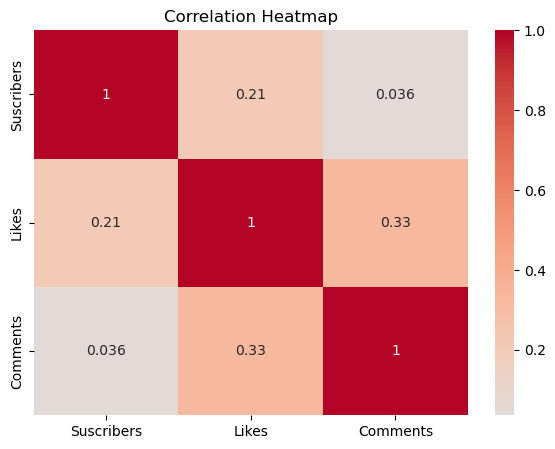

In [7]:
# Identify the most popular categories among the top YouTube streamers
popular_categories = yt_df['Categories'].value_counts().head(10)
print('Most popular categories:\n', popular_categories)



# Create a heatmap for the correlation matrix
correlation_matrix = yt_df[['Suscribers', 'Likes', 'Comments']].corr()
correlation_matrix
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

The color intensity in the heatmap represents the strength of the correlation. As we can see, the number of likes and comments have a stronger correlation with each other compared to their correlation with the number of subscribers.

# 3. Audience Study:

In [8]:
# Analyze the distribution of streamers' audiences by country
audience_country = yt_df['Country'].value_counts()
print('Distribution of audiences by country:\n', audience_country.head(10))

# Check if there are regional preferences for specific content categories
regional_preferences = yt_df.groupby('Country')['Categories'].value_counts()
print('\nRegional preferences for specific content categories:\n', regional_preferences.head(10))

Distribution of audiences by country:
 Country
Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Name: count, dtype: int64

Regional preferences for specific content categories:
 Country         Categories            
Arabia Saudita  Música y baile            2
                Animación, Videojuegos    1
Argelia         Educación                 1
Argentina       Películas, Animación      2
                Animación                 1
                Películas                 1
                Películas, Humor          1
Bangladesh      Noticias y Política       1
                Viajes, Espectáculos      1
                Vlogs diarios             1
Name: count, dtype: int64


From the data, we can see that the United States and India have the highest number of audiences. As for regional preferences, it seems that different countries have different preferences for content categories. For example, in Saudi Arabia, 'Music and Dance' is the most popular category, while in Algeria, 'Education' is the most popular.

# 4. Performance Metrics:

Average Subscribers: 21894400.0
Average Visits: 1209446.3155
Average Likes: 53632.592
Average Comments: 1288.768


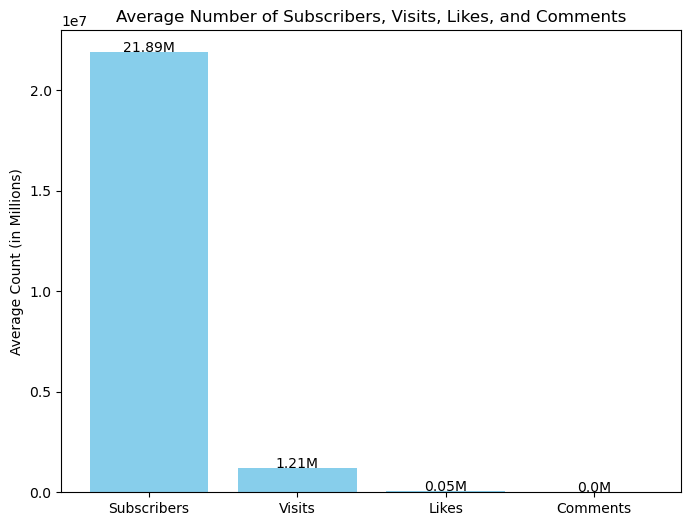

In [36]:


# Calculate the average number of subscribers, visits, likes, and comments
avg_subscribers = yt_df['Suscribers'].mean()
avg_visits = yt_df['Visits'].mean()
avg_likes = yt_df['Likes'].mean()
avg_comments = yt_df['Comments'].mean()

# Print the averages
print('Average Subscribers:', avg_subscribers)
print('Average Visits:', avg_visits)
print('Average Likes:', avg_likes)
print('Average Comments:', avg_comments)

# Create a bar plot to visualize these averages
labels = ['Subscribers', 'Visits', 'Likes', 'Comments']
averages = [avg_subscribers, avg_visits, avg_likes, avg_comments]

plt.figure(figsize=(8, 6))
plt.bar(labels, averages, color='skyblue')

# Adding data labels with 'M' suffix
for i in range(len(labels)):
    plt.text(i, averages[i], str(round(averages[i]/1e6, 2)) + 'M', ha = 'center')

plt.title('Average Number of Subscribers, Visits, Likes, and Comments')
plt.ylabel('Average Count (in Millions)')
plt.show()

Each bar represents the average count (in millions) of subscribers, visits, likes, and comments respectively. This visualization helps us understand the average engagement metrics for these YouTube channels.

# 5. Content Categories:

In [10]:
# Splitting the 'Categories' column as each cell contains multiple categories
yt_df['Categories'] = yt_df['Categories'].str.split(', ')

# Exploding the dataframe on 'Categories' column
exploded_df = yt_df.explode('Categories')

# Counting the number of streamers in each category
category_counts = exploded_df['Categories'].value_counts()

# Displaying the categories with the highest number of streamers
category_counts.head()



Categories
Música y baile    224
Animación         190
Películas         177
Humor              95
Videojuegos        81
Name: count, dtype: int64

As we can see, 'Música y baile' (Music and Dance) has the highest number of streamers, followed by 'Animación' (Animation), 'Películas' (Movies), 'Humor', and 'Videojuegos' (Video Games).

In [12]:
# Calculating the average performance metrics for each category
average_metrics = exploded_df.groupby('Categories')[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

# Displaying the categories with exceptional performance metrics
average_metrics.sort_values(by='Suscribers', ascending=False).head()

,Suscribers,Visits,Likes,Comments
Categories,,,,
Juguetes,2.692742e+07,5.377903e+05,3274.983871,50.870968
Música y baile,2.476071e+07,4.623567e+05,18173.397321,1610.125000
Educación,2.447692e+07,1.057096e+06,41762.615385,1419.000000
Videojuegos,2.423827e+07,3.067986e+06,139924.246914,3182.901235
Animación,2.202737e+07,1.138641e+06,47474.873684,1740.084211


* As we can see, 'Juguetes' (Toys) category has the highest average number of subscribers, followed by 'Música y baile' (Music and Dance), 'Educación' (Education), 'Videojuegos' (Video Games), and 'Animación' (Animation).

* These categories not only have a high number of streamers but also perform exceptionally well in terms of average subscribers, visits, likes, and comments.

# 6. Brands and Collaborations:

In [17]:
# Calculating the correlation
performance_metrics = ['Suscribers', 'Likes', 'Comments']
correlations = yt_df[performance_metrics + ['Visits']].corr()

# Displaying the correlation between performance metrics and visits
correlations['Visits']



Suscribers    0.245203
Likes         0.950470
Comments      0.324067
Visits        1.000000
Name: Visits, dtype: float64

As we can see, 'Likes' has the highest correlation with 'Visits' (0.95), followed by 'Comments' (0.32), and 'Subscribers' (0.24). This suggests that streamers with more likes are more likely to have more visits, which could indicate more brand collaborations and marketing campaigns.

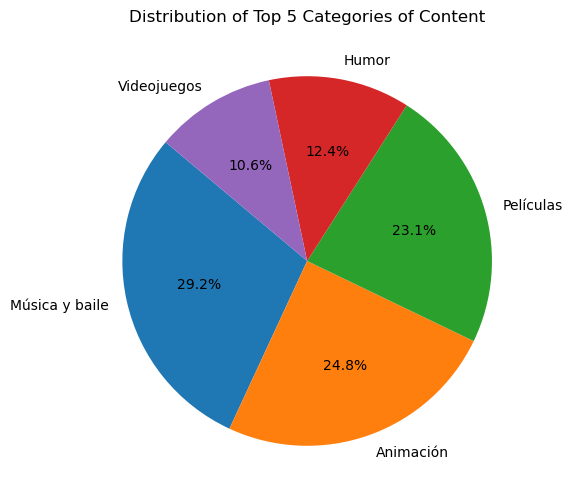

In [19]:
# Selecting the top 5 categories
n = 5
top_categories = category_counts.head(n)

# Plotting a pie chart
plt.figure(figsize=(7, 6))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 5 Categories of Content')
plt.show()

This chart provides a visual representation of the proportion of streamers in each of these categories. As we can see, 'Música y baile' (Music and Dance) and 'Animación' (Animation) make up a significant portion of the top categories.

# 7. Benchmarking:

In [21]:
# Calculating the average number of subscribers, visits, likes, and comments
average_subscribers = yt_df['Suscribers'].mean()
average_visits = yt_df['Visits'].mean()
average_likes = yt_df['Likes'].mean()
average_comments = yt_df['Comments'].mean()

# Selecting the streamers with above-average performance
above_average_streamers = yt_df[(yt_df['Suscribers'] > average_subscribers) & (yt_df['Visits'] > average_visits) & (yt_df['Likes'] > average_likes) & (yt_df['Comments'] > average_comments)]

# Displaying the top-performing content creators
above_average_streamers.sort_values(by=['Suscribers', 'Visits', 'Likes', 'Comments'], ascending=False).head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
1,2,MrBeast,"[Videojuegos, Humor]",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
5,6,PewDiePie,"[Películas, Videojuegos]",111500000,Estados Unidos,2400000.0,197300,4900,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
26,27,dudeperfect,[Videojuegos],59700000,Estados Unidos,5300000.0,156500,4200,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...
34,35,TaylorSwift,[Música y baile],54100000,Estados Unidos,4300000.0,300400,15000,http://youtube.com/channel/UCqECaJ8Gagnn7YCbPE...
39,40,JuegaGerman,"[Películas, Animación]",48600000,México,2000000.0,117100,3000,http://youtube.com/channel/UCYiGq8XF7YQD00x7wA...


As we can see, 'MrBeast' is the top-performing content creator, followed by 'PewDiePie', 'dudeperfect', 'TaylorSwift', and 'JuegaGerman'. These content creators not only have a high number of subscribers but also perform exceptionally well in terms of visits, likes, and comments.

# 8. Content Recommendations:

In [5]:
# Calculate TotalEngagementScore for each content creator
yt_df['TotalEngagementScore']= yt_df['Suscribers'] + yt_df['Likes'] + yt_df['Comments']

# Identify top_performing_creators based on TotalEngagementScore
top_performing_creators = yt_df.nlargest(10, 'TotalEngagementScore')

# Display information about the Top Performing Content Creators
('Top Performing Content Creators')
(top_performing_creators[['Username', 'TotalEngagementScore']])

,Username,TotalEngagementScore
0,tseries,249502778
1,MrBeast,188818500
2,CoComelon,165524700
3,SETIndia,162600175
4,KidsDianaShow,113512400
5,PewDiePie,111702200
6,LikeNastyaofficial,107528000
7,VladandNiki,101422100
8,zeemusiccompany,99702632
9,WWE,97206514


##### These top content creators span various genres, including music, entertainment, children's content, and individual creators. This information can guide content recommendation algorithms to suggest diverse and engaging content to users based on their preferences and viewing history.